In [ ]:
import pandas as pd

# Load the training dataset
train_data = pd.read_csv('DailyDelhiClimateTrain.csv', parse_dates=['date'], index_col='date')

# Load the testing dataset
test_data = pd.read_csv('DailyDelhiClimateTest.csv', parse_dates=['date'], index_col='date')

# Concatenate the datasets for exploration and preprocessing
data = pd.concat([train_data, test_data])

# Explore the structure
print(data.head())
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Handle missing values (example: imputation with mean)
data['meantemp'].fillna(data['meantemp'].mean(), inplace=True)

# Describe key statistics
print(data.describe())

             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1576 entries, 2013-01-01 to 2017-04-24
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1576 non-null   float64
 1   humidity      1576 non-null   float64
 2   wind_speed    1576 non-null   float64
 3   meanpressure  1576 non-null   float64
dtypes: float64(4)
memory usage: 61.6 KB
None
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64
          meantemp     humidity   wind_speed  meanpressure
count  1576.000

<ipython-input-23-52ab5059d914>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['meantemp'].fillna(data['meantemp'].mean(), inplace=True)


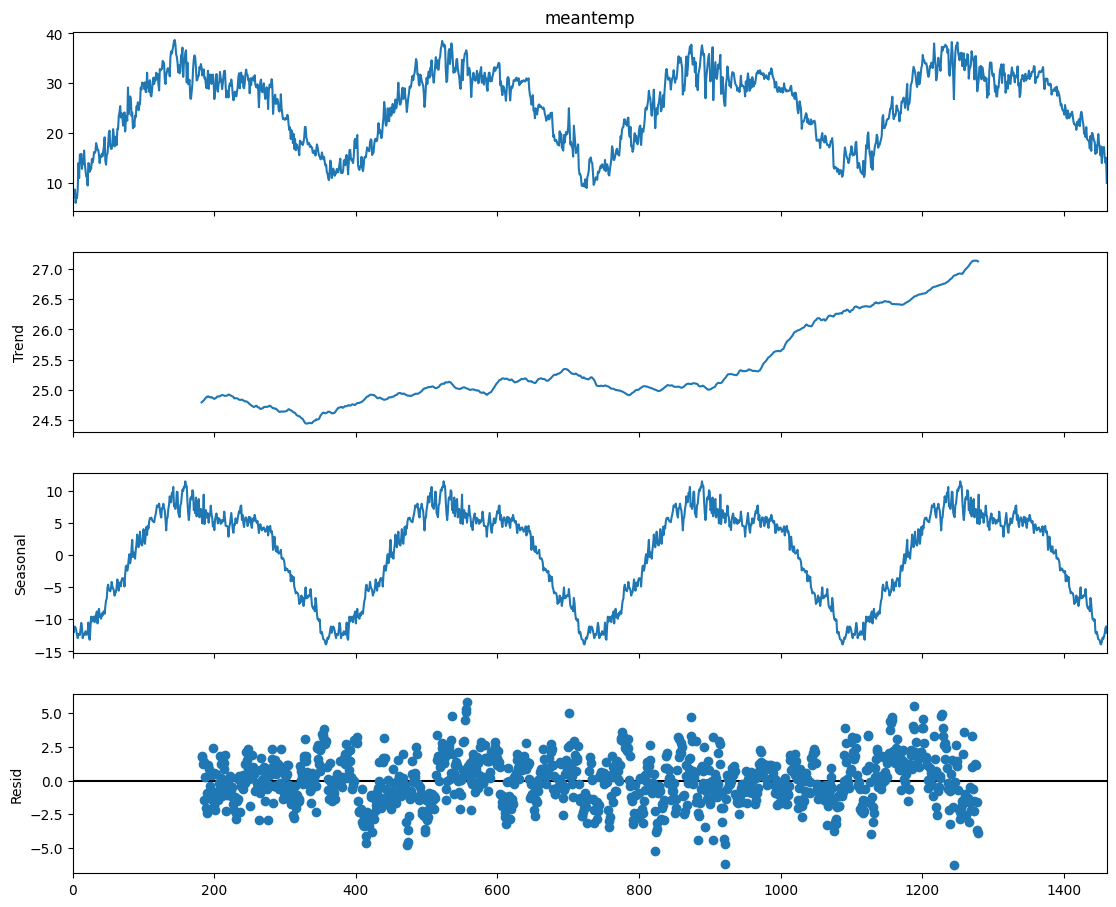


Seasonal Component Description:
0   -11.112191
1   -12.097390
2   -11.386488
3   -11.134559
4   -11.317170
Name: seasonal, dtype: float64


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_result = seasonal_decompose(data['meantemp'], model='additive', period=365)

fig = decompose_result.plot()
fig.set_size_inches(12, 10)
plt.show()

print("\nSeasonal Component Description:")
print(decompose_result.seasonal.head())


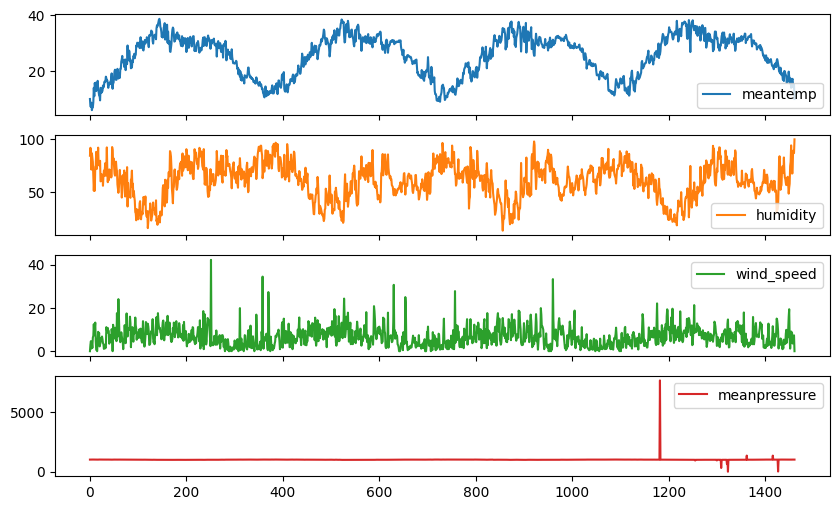

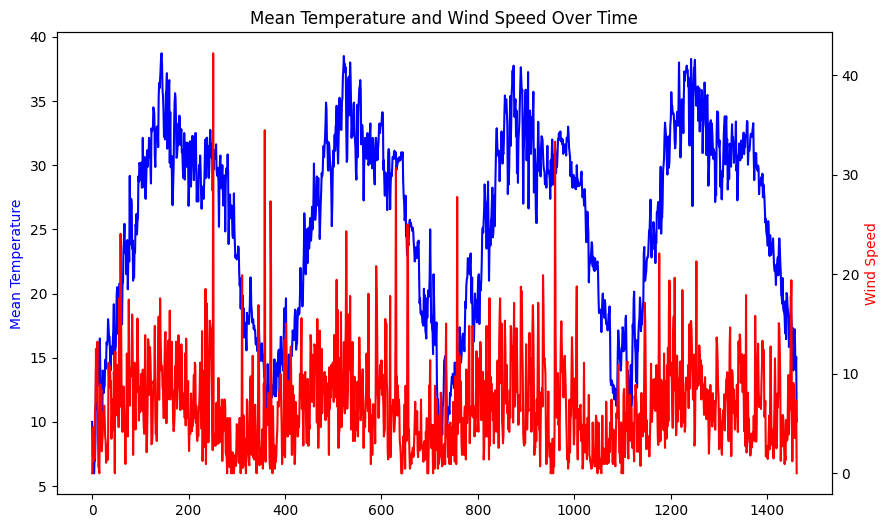

In [ ]:
import matplotlib.pyplot as plt

data.plot(subplots=True, figsize=(10, 6))
plt.show()

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(data.index, data['meantemp'], color='blue')
ax1.set_ylabel('Mean Temperature', color='blue')
ax2 = ax1.twinx()
ax2.plot(data.index, data['wind_speed'], color='red')
ax2.set_ylabel('Wind Speed', color='red')
plt.title('Mean Temperature and Wind Speed Over Time')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

target = 'meantemp'
data[target] = data[target].fillna(method='bfill')

train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

decompose_train = seasonal_decompose(train[target], model='additive', period=365)

forecast = decompose_train.trend + decompose_train.seasonal

forecast = forecast[-len(test):]

forecast = forecast.fillna(forecast.mean()) # This line is added to handle NaN

mae = mean_absolute_error(test[target], forecast)
rmse = math.sqrt(mean_squared_error(test[target], forecast))

print(f"\nForecasting Performance:\nMean Absolute Error (MAE): {mae:.2f}\nRoot Mean Squared Error (RMSE): {rmse:.2f}")


Forecasting Performance:
Mean Absolute Error (MAE): 4.82
Root Mean Squared Error (RMSE): 6.60


<ipython-input-20-6bf31f38ec6f>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[target] = data[target].fillna(method='bfill')
